## Gather and clean data

In [ ]:
'''
Reviews on the Apple app store are available as rss feed. 
The link is: https://itunes.apple.com/us/rss/customerreviews/id=1054502004/sortBy=mostRecent/xml or
mostHelpful
Then convert to csv with online xml to csv converter tool'''

In [8]:
import pandas as pd
import numpy as np

In [9]:
dfr = pd.read_csv ('20190712_app_store_reviews_recent.csv')
dfh = pd.read_csv ('20190712_app_store_reviews_helpful.csv')

In [10]:
dfr

,id,title,updated,link.0._rel,link.0._type,link.0._href,link.1._rel,link.1._href,link.2._rel,link.2._href,...,entry.49.version.__prefix,entry.49.version.__text,entry.49.version.toString,entry.49.author.name,entry.49.author.uri,entry.49.link._rel,entry.49.link._href,_xmlns:im,_xmlns,_xml:lang
0,https://itunes.apple.com/us/rss/customerreview...,iTunes Store: Customer Reviews,2019-07-12T11:26:11-07:00,alternate,text/html,https://music.apple.com/WebObjects/MZStore.woa...,self,https://itunes.apple.com/us/rss/customerreview...,first,https://itunes.apple.com/us/rss/customerreview...,...,im,0.10.1,NaN,Cdghgdeyjvcdyke,https://itunes.apple.com/us/reviews/id188801612,related,https://itunes.apple.com/us/review?id=10545020...,http://itunes.apple.com/rss,http://www.w3.org/2005/Atom,en


In [11]:
# Only want reviews.  These are entry.x.content.0.__text columns
dfr = dfr.loc[:, dfr.columns.str.contains('content.0.__text|.rating.__text')]
dfh = dfh.loc[:, dfh.columns.str.contains('content.0.__text|.rating.__text')]
dfh

,entry.0.content.0.__text,entry.0.rating.__text,entry.1.content.0.__text,entry.1.rating.__text,entry.2.content.0.__text,entry.2.rating.__text,entry.3.content.0.__text,entry.3.rating.__text,entry.4.content.0.__text,entry.4.rating.__text,...,entry.45.content.0.__text,entry.45.rating.__text,entry.46.content.0.__text,entry.46.rating.__text,entry.47.content.0.__text,entry.47.rating.__text,entry.48.content.0.__text,entry.48.rating.__text,entry.49.content.0.__text,entry.49.rating.__text
0,Heard about this app through an ad while playi...,4,This app as I heard is an amazing app that peo...,1,I didn’t like it because all the manga there h...,1,I was so excited to try this app when I saw th...,1,This app is wonderful the art work and the sto...,4,...,"Tried a free trial, but couldn’t even register...",1,"A dream to use, and progressive content is a m...",5,The app looks really good but for some reason ...,1,The moment I get in it starts pushing for me t...,1,I seriously cannot read any of the stories! I ...,1


In [12]:
# Transpose before concatenating
dfr = dfr.transpose()
dfh = dfh.transpose()
dfh.head()

,0
entry.0.content.0.__text,Heard about this app through an ad while playi...
entry.0.rating.__text,4
entry.1.content.0.__text,This app as I heard is an amazing app that peo...
entry.1.rating.__text,1
entry.2.content.0.__text,I didn’t like it because all the manga there h...


In [13]:
#putting the reviews in one column and the ratings in another
dfr = pd.DataFrame({'review':dfr[0].iloc[::2].values, 'rating':dfr[0].iloc[1::2].values})
dfh = pd.DataFrame({'review':dfh[0].iloc[::2].values, 'rating':dfh[0].iloc[1::2].values})

In [14]:
#Exporting the most helpful and the most recent will surely have duplicates
df = pd.concat([dfr,dfh]).drop_duplicates().reset_index(drop=True)
df.head()

,review,rating
0,I loved the vertical scrolling of the comics (...,2
1,I really enjoyed the content in this app. But...,1
2,Heard about this app through an ad while playi...,4
3,I was so excited to try this app when I saw th...,1
4,When I first downloaded this app I thought it ...,2


In [15]:
df.shape

(70, 2)

In [16]:
# Split good reviews (4 and 5 stars) and bad reviews (1 and 2 stars)
good = df.loc[df['rating'].isin([4,5])]
bad = df.loc[df['rating'].isin([1,2])]
good

,review,rating
2,Heard about this app through an ad while playi...,4
14,I really like that you add all those deatails\...,5
15,This application is trully AMAZING! It has a g...,5
23,Two owe,5
28,The storylines are incredibly catching and wel...,5
43,Offers a huge selection of visually stunning s...,5
49,This app is wonderful the art work and the sto...,4
50,I really like this app. Really appreciate that...,5
51,Stela Unlimited provides you with instant acce...,5
52,"With this app, you get a new story every week ...",5


## NLP 

In [17]:
from gensim.utils import simple_preprocess

import nltk
from nltk.corpus import stopwords
from nltk.util import bigrams
from nltk import FreqDist, Text
from nltk.stem import PorterStemmer

In [18]:
g = good['review']
g = g.str.cat(sep=' ')
g

'Heard about this app through an ad while playing another game. Didn’t even have to think about it. Just downloaded it. The art alone would’ve sold me, but that it might have stories for LGBTQ whut??? Yes, please sign me up! Or I would say that if I could afford it hehe.😅 \nDon’t get me wrong...I think the artists and the development team deserve every penny. I just don’t have any pennies to spare sigh lol. This’ll just be like passing by another of those shiny baubles in a shop window and thinking...oh well someday maybe. \nGave 4 stars because I loved what I was able to see of the app and artwork. \nSo. Cool.  👍🏽🤩👍🏽 I really like that you add all those deatails\nI Love it This application is trully AMAZING! It has a good selection of comics with great art and stories. I read some reviews get very frustrated with the pay-to-read, but I see the artists and writers, and even the app developers behind it are worth to be thanked for their hard work. And the monthly subscription price is r

In [19]:
stop_words = stopwords.words('english') 
def remove_stopwords(texts):
    return [word for word in simple_preprocess(str(texts)) if word not in stop_words] 

In [20]:
words_nostops = remove_stopwords(g)
words_nostops

['heard',
 'app',
 'ad',
 'playing',
 'another',
 'game',
 'even',
 'think',
 'downloaded',
 'art',
 'alone',
 'would',
 'sold',
 'might',
 'stories',
 'lgbtq',
 'whut',
 'yes',
 'please',
 'sign',
 'would',
 'say',
 'could',
 'afford',
 'hehe',
 'get',
 'wrong',
 'think',
 'artists',
 'development',
 'team',
 'deserve',
 'every',
 'penny',
 'pennies',
 'spare',
 'sigh',
 'lol',
 'like',
 'passing',
 'another',
 'shiny',
 'baubles',
 'shop',
 'window',
 'thinking',
 'oh',
 'well',
 'someday',
 'maybe',
 'gave',
 'stars',
 'loved',
 'able',
 'see',
 'app',
 'artwork',
 'cool',
 'really',
 'like',
 'add',
 'deatails',
 'love',
 'application',
 'trully',
 'amazing',
 'good',
 'selection',
 'comics',
 'great',
 'art',
 'stories',
 'read',
 'reviews',
 'get',
 'frustrated',
 'pay',
 'read',
 'see',
 'artists',
 'writers',
 'even',
 'app',
 'developers',
 'behind',
 'worth',
 'thanked',
 'hard',
 'work',
 'monthly',
 'subscription',
 'price',
 'reasonable',
 'especially',
 'comparing',
 'buy

In [21]:
words_bigrams = (list(bigrams(words_nostops)))
words_bigrams[0:8]

[('heard', 'app'),
 ('app', 'ad'),
 ('ad', 'playing'),
 ('playing', 'another'),
 ('another', 'game'),
 ('game', 'even'),
 ('even', 'think'),
 ('think', 'downloaded')]

In [22]:
#words = data_words_stem + data_bigrams
words = words_nostops + words_bigrams
words [::50]

['heard',
 'gave',
 'apps',
 'reading',
 'instant',
 'books',
 'able',
 'nice',
 'app',
 'use',
 ('thinking', 'oh'),
 ('buying', 'tokens'),
 ('could', 'see'),
 ('frequency', 'updates'),
 ('stories', 'chose'),
 ('believe', 'app'),
 ('something', 'draws'),
 ('unique', 'please'),
 ('app', 'time')]

## Sentiment Analysis

In [ ]:
from collections import Counter
import operator
import matplotlib.pyplot as plt

In [ ]:
def get_afinn_scores(file = 'AFINN-en-165.txt'): 
    afinn_file = open(file)
    scores = {}
    for line in afinn_file:
      term, score  = line.split("\t")
      scores[term] = int(score)
    return scores

In [ ]:
get_afinn_scores()

In [ ]:
'''
afinn_scores = get_afinn_scores()

 ## Get the total AFFIN score
score = 0
for w in data_words_nostops:
    if w.lower() in afinn_scores:
        score += afinn_scores[w.lower()]
        
mean = score/len(good)
mean
'''

In [ ]:
afinn_scores = get_afinn_scores()

good_pos=[]
for word in words:
    if word in afinn_scores and afinn_scores[word] > 0:
        good_pos.append(word)
good_pos[0:5]

In [ ]:
good_neg=[]
for word in words:
    if word in afinn_scores and afinn_scores[word] < 0:
        good_neg.append(word)
good_neg[0:5]

In [ ]:
good_posneg = good_pos + good_neg
good_posneg[0:5]

In [ ]:
count_good_pos = Counter(good_pos)
count_good_pos

In [ ]:
count_good_neg = Counter(good_neg)
count_good_neg

In [ ]:
count_good_posneg = Counter(good_posneg)
count_good_posneg

In [ ]:
freq_good_pos = {k: v for k,v in count_good_pos.items() if v > 1}
freq_good_pos

In [ ]:
freq_good_neg = {k: v for k,v in count_good_neg.items() if v > 1}
freq_good_neg

In [ ]:
freq_good_posneg = {k: v for k,v in count_good_posneg.items() if v > 1}
freq_good_posneg

In [ ]:
sorted_freq_good_pos = dict( sorted(freq_good_pos.items(), key=operator.itemgetter(1),reverse=False))
sorted_freq_good_pos

In [ ]:
sorted_freq_good_neg = dict( sorted(freq_good_neg.items(), key=operator.itemgetter(1),reverse=False))
sorted_freq_good_neg

In [ ]:
sorted_freq_good_posneg = dict( sorted(freq_good_posneg.items(), key=operator.itemgetter(1),reverse=False))
sorted_freq_good_posneg

In [ ]:
len(sorted_freq_good_pos), len(sorted_freq_good_neg), len(sorted_freq_good_posneg)

In [ ]:
#Plotting positive / negative sentiment words for 4/5 star reviews

height_posneg = list(sorted_freq_good_posneg.values())
bars_posneg = list(sorted_freq_good_posneg.keys())
y_posneg = np.arange(len(bars_posneg))

height_pos = list(sorted_freq_good_pos.values())
bars_pos = list(sorted_freq_good_pos.keys())

height_neg = list(sorted_freq_good_neg.values())
bars_neg = list(sorted_freq_good_neg.keys())

#indices to get the y values/position of each list
idp = [ bars_posneg.index(b) for b in bars_pos ]
ign = [ bars_posneg.index(b) for b in bars_neg ]

#Make plot bigger than default
fig=plt.figure (figsize=(10, 8), dpi= 80)

# Create horizontal bars
plt.barh(idp, height_pos, color = 'green', label = 'Postive Sentiment')
plt.barh(ign, height_neg, color = 'red', label = 'Negative Sentiment')

# Create names on the y-axis
plt.yticks(y_posneg, bars_posneg)
plt.xticks([])
plt.xlabel ('Frequency')
plt.title('Common Words in 4-Star and 5-Star iOS Reviews')
plt.legend()

# Show graphic
plt.show()


In [25]:

import pandas as pd
import numpy as np
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
from nltk.util import bigrams
from nltk import FreqDist, Text
from nltk.stem import PorterStemmer
from collections import Counter
import operator
import matplotlib.pyplot as plt

dfr = pd.read_csv ('20190712_app_store_reviews_recent.csv')
dfh = pd.read_csv ('20190712_app_store_reviews_helpful.csv')
dfr = dfr.loc[:, dfr.columns.str.contains('content.0.__text|.rating.__text')]
dfh = dfh.loc[:, dfh.columns.str.contains('content.0.__text|.rating.__text')]
dfr = dfr.transpose()
dfh = dfh.transpose()
dfr = pd.DataFrame({'review':dfr[0].iloc[::2].values, 'rating':dfr[0].iloc[1::2].values})
dfh = pd.DataFrame({'review':dfh[0].iloc[::2].values, 'rating':dfh[0].iloc[1::2].values})
df = pd.concat([dfr,dfh]).drop_duplicates().reset_index(drop=True)
good = df.loc[df['rating'].isin([4,5])]
bad = df.loc[df['rating'].isin([1,2])]

#x = good['review']
x = bad['review']


t = x.str.cat(sep=' ')

stop_words = stopwords.words('english') 
def remove_stopwords(texts):
    return [word for word in simple_preprocess(str(texts)) if word not in stop_words] 

words_nostops = remove_stopwords(t)

words_bigrams = (list(bigrams(words_nostops)))

words = words_nostops + words_bigrams

def get_afinn_scores(file = 'AFINN-en-165.txt'): 
    afinn_file = open(file)
    scores = {}
    for line in afinn_file:
      term, score  = line.split("\t")
      scores[term] = int(score)
    return scores

afinn_scores = get_afinn_scores()
pos=[]
for word in words:
    if word in afinn_scores and afinn_scores[word] > 0:
        pos.append(word)

neg=[]
for word in words:
    if word in afinn_scores and afinn_scores[word] < 0:
        neg.append(word)

posneg = pos + neg

count_pos = Counter(pos)
count_neg = Counter(neg)
count_posneg = Counter(posneg)

freq_pos = {k: v for k,v in count_pos.items() if v > 1}
freq_neg = {k: v for k,v in count_neg.items() if v > 1}
freq_posneg = {k: v for k,v in count_posneg.items() if v > 1}

sorted_freq_pos = dict( sorted(freq_pos.items(), key=operator.itemgetter(1),reverse=False))
sorted_freq_neg = dict( sorted(freq_neg.items(), key=operator.itemgetter(1),reverse=False))
sorted_freq_posneg = dict( sorted(freq_posneg.items(), key=operator.itemgetter(1),reverse=False))


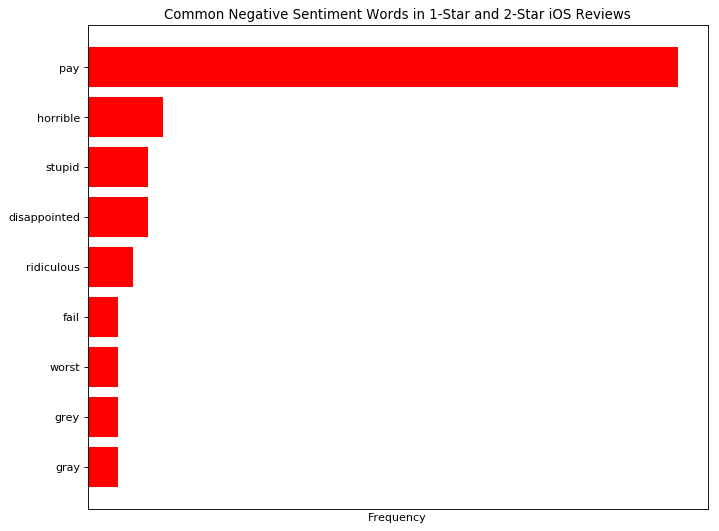

In [29]:
#Plotting positive / negative sentiment words 

height_posneg = list(sorted_freq_posneg.values())
bars_posneg = list(sorted_freq_posneg.keys())
y_posneg = np.arange(len(bars_posneg))

height_pos = list(sorted_freq_pos.values())
bars_pos = list(sorted_freq_pos.keys())
y_pos = np.arange(len(bars_pos))

height_neg = list(sorted_freq_neg.values())
bars_neg = list(sorted_freq_neg.keys())
y_neg = np.arange(len(bars_neg))

#indices to get the y values/position of each list
idp = [ bars_posneg.index(b) for b in bars_pos ]
ign = [ bars_posneg.index(b) for b in bars_neg ]

#Make plot bigger than default
fig=plt.figure (figsize=(10, 8), dpi= 80)

# Create horizontal bars
#plt.barh(idp, height_pos, color = 'green', label = 'Postive Sentiment')
#plt.barh(ign, height_neg, color = 'red', label = 'Negative Sentiment')
plt.barh(y_neg, height_neg, color = 'red', label = 'Negative Sentiment')

# Create names on the y-axis
#plt.yticks(y_posneg, bars_posneg)
plt.yticks(y_neg, bars_neg)
plt.xticks([])
plt.xlabel ('Frequency')
plt.title('Common Negative Sentiment Words in 1-Star and 2-Star iOS Reviews')
#plt.legend()

# Show graphic
plt.show()


In [30]:

import pandas as pd
import numpy as np
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
from nltk.util import bigrams
from nltk import FreqDist, Text
from nltk.stem import PorterStemmer
from collections import Counter
import operator
import matplotlib.pyplot as plt

dfr = pd.read_csv ('20190712_app_store_reviews_recent.csv')
dfh = pd.read_csv ('20190712_app_store_reviews_helpful.csv')
dfr = dfr.loc[:, dfr.columns.str.contains('content.0.__text|.rating.__text')]
dfh = dfh.loc[:, dfh.columns.str.contains('content.0.__text|.rating.__text')]
dfr = dfr.transpose()
dfh = dfh.transpose()
dfr = pd.DataFrame({'review':dfr[0].iloc[::2].values, 'rating':dfr[0].iloc[1::2].values})
dfh = pd.DataFrame({'review':dfh[0].iloc[::2].values, 'rating':dfh[0].iloc[1::2].values})
df = pd.concat([dfr,dfh]).drop_duplicates().reset_index(drop=True)
good = df.loc[df['rating'].isin([4,5])]
bad = df.loc[df['rating'].isin([1,2])]

x = good['review']
#x = bad['review']


t = x.str.cat(sep=' ')

stop_words = stopwords.words('english') 
def remove_stopwords(texts):
    return [word for word in simple_preprocess(str(texts)) if word not in stop_words] 

words_nostops = remove_stopwords(t)

words_bigrams = (list(bigrams(words_nostops)))

words = words_nostops + words_bigrams

def get_afinn_scores(file = 'AFINN-en-165.txt'): 
    afinn_file = open(file)
    scores = {}
    for line in afinn_file:
      term, score  = line.split("\t")
      scores[term] = int(score)
    return scores

afinn_scores = get_afinn_scores()
pos=[]
for word in words:
    if word in afinn_scores and afinn_scores[word] > 0:
        pos.append(word)

neg=[]
for word in words:
    if word in afinn_scores and afinn_scores[word] < 0:
        neg.append(word)

posneg = pos + neg

count_pos = Counter(pos)
count_neg = Counter(neg)
count_posneg = Counter(posneg)

freq_pos = {k: v for k,v in count_pos.items() if v > 1}
freq_neg = {k: v for k,v in count_neg.items() if v > 1}
freq_posneg = {k: v for k,v in count_posneg.items() if v > 1}

sorted_freq_pos = dict( sorted(freq_pos.items(), key=operator.itemgetter(1),reverse=False))
sorted_freq_neg = dict( sorted(freq_neg.items(), key=operator.itemgetter(1),reverse=False))
sorted_freq_posneg = dict( sorted(freq_posneg.items(), key=operator.itemgetter(1),reverse=False))


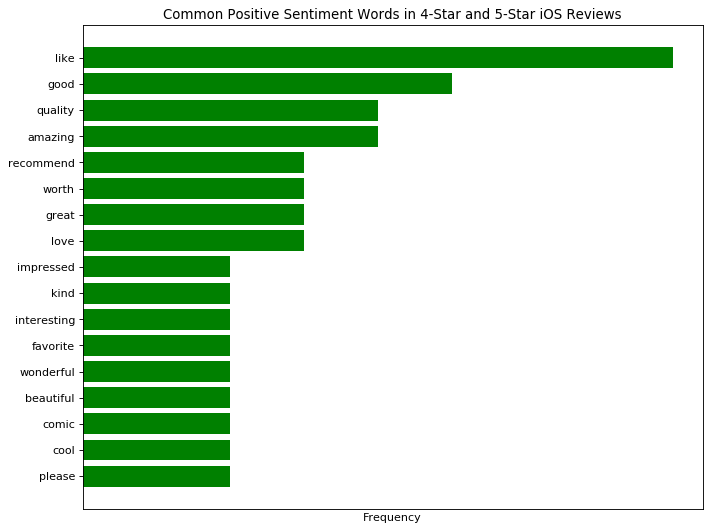

In [31]:
height_posneg = list(sorted_freq_posneg.values())
bars_posneg = list(sorted_freq_posneg.keys())
y_posneg = np.arange(len(bars_posneg))

height_pos = list(sorted_freq_pos.values())
bars_pos = list(sorted_freq_pos.keys())
y_pos = np.arange(len(bars_pos))

height_neg = list(sorted_freq_neg.values())
bars_neg = list(sorted_freq_neg.keys())
y_neg = np.arange(len(bars_neg))

#indices to get the y values/position of each list
idp = [ bars_posneg.index(b) for b in bars_pos ]
ign = [ bars_posneg.index(b) for b in bars_neg ]

#Make plot bigger than default
fig=plt.figure (figsize=(10, 8), dpi= 80)

# Create horizontal bars
#plt.barh(idp, height_pos, color = 'green', label = 'Postive Sentiment')
plt.barh(y_pos, height_pos, color = 'green', label = 'Positive Sentiment')
#plt.barh(ign, height_neg, color = 'red', label = 'Negative Sentiment')
#plt.barh(y_neg, height_neg, color = 'red', label = 'Negative Sentiment')

# Create names on the y-axis
#plt.yticks(y_posneg, bars_posneg)
plt.yticks(y_pos, bars_pos)
plt.xticks([])
plt.xlabel ('Frequency')
plt.title('Common Positive Sentiment Words in 4-Star and 5-Star iOS Reviews')
#plt.legend()

# Show graphic
plt.show()
